In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("cleaned_2022.csv")
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,0.000,Crash on CR-11 Army Trail Rd at IL-59.,Army Trail Rd,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,0.000,Crash on CA-138 Pearblossom Hwy at 96th St.,Pearblossom Hwy,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,0.000,Crash on 2nd St Northbound at Franklin St.,N 2nd St,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,0.000,Crash on US-62 Atlantic Blvd Westbound after O...,Atlantic Blvd NE,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,1.910,Crash on entry ramp to I-77 Northbound at Exit...,I-77 N,...,False,False,False,False,False,False,Night,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642587,A-5464714,Source1,2,2022-10-08 13:29:50,2022-10-08 14:44:50.000000000,32.916783,-96.717758,0.034,Incident on AUDELIA RD near CHIMNEY HILL LN Dr...,Shadow Way,...,False,False,False,False,True,False,Day,Day,Day,Day
1642588,A-5464715,Source1,2,2022-10-11 05:30:00,2022-10-11 06:47:57.000000000,33.882405,-117.364874,0.037,Incident on VAN BUREN BLVD near HOUSE 17050 Dr...,Van Buren Blvd,...,False,False,False,False,False,False,Night,Night,Night,Day
1642589,A-5464716,Source1,2,2022-08-25 09:41:00,2022-08-25 11:00:54.000000000,33.882416,-117.366134,0.012,Incident on VAN BUREN BLVD near WASHINGTON ST ...,Van Buren Blvd,...,False,False,False,False,True,False,Day,Day,Day,Day
1642590,A-5464717,Source1,2,2022-06-28 14:18:09,2022-06-28 19:29:33.000000000,40.692173,-73.550584,5.314,Slow traffic on Southern State Pkwy E from Mer...,Southern Pkwy,...,False,False,False,False,False,False,Day,Day,Day,Day


In [22]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [23]:
df.iloc[0]

ID                                                     A-512230
Source                                                  Source2
Severity                                                      1
Start_Time                                  2022-09-08 05:49:30
End_Time                                    2022-09-08 06:34:53
Start_Lat                                             41.946796
Start_Lng                                            -88.208092
Distance(mi)                                                0.0
Description              Crash on CR-11 Army Trail Rd at IL-59.
Street                                            Army Trail Rd
City                                                   Bartlett
County                                                   DuPage
State                                                        IL
Zipcode                                                   60103
Country                                                      US
Timezone                                

In [24]:
nan_columns = df.columns[df.isna().any()]
print("有缺值的欄位：", nan_columns.tolist())

# 計算每個有缺值欄位的缺值數量
nan_counts = df[nan_columns].isna().sum()
print("各欄位缺值數量：")
print(nan_counts)

有缺值的欄位： []
各欄位缺值數量：
Series([], dtype: float64)


In [25]:
import pandas as pd

# 1. 去除有 NaN 的列（針對整張表，也可改針對特定欄位）
df_clean = df

# 2. 確保時間欄位是 datetime 型態
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)
df_clean['Weather_Timestamp'] = pd.to_datetime(df_clean['Weather_Timestamp'])

# 3. 從時間欄位拆出小時與分鐘
df_clean['Hour'] = df_clean['Start_Time'].dt.hour

df_clean['Weather_Hour'] = df_clean['Weather_Timestamp'].dt.hour

# 4. 檢查結果
print(df_clean[['Start_Time', 'Hour', 'Weather_Timestamp', 'Weather_Hour']].head())

C:\Users\Tim Chen\AppData\Local\Temp\ipykernel_26848\2020919463.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], errors='coerce', infer_datetime_format=True)


           Start_Time  Hour   Weather_Timestamp  Weather_Hour
0 2022-09-08 05:49:30     5 2022-09-08 05:52:00             5
1 2022-09-08 02:02:05     2 2022-09-08 01:53:00             1
2 2022-09-08 05:14:12     5 2022-09-08 05:16:00             5
3 2022-09-08 06:22:57     6 2022-09-08 06:51:00             6
4 2022-09-08 06:36:20     6 2022-09-08 06:53:00             6


In [26]:
# ## 1. 時間衍生特徵與天氣標準化

print("衍生時間特徵...")
df_clean['DayOfWeek']  = df_clean['Start_Time'].dt.dayofweek
df_clean['Month']      = df_clean['Start_Time'].dt.month
df_clean['IsWeekend']  = df_clean['DayOfWeek'].isin([5, 6]).astype(int)
df_clean['IsRushHour'] = df_clean['Hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)
df_clean['IsNight']    = ((df_clean['Hour'] >= 22) | (df_clean['Hour'] <= 4)).astype(int)

print("標準化天氣條件...")
weather_conditions = {
    'Clear' : ['Clear', 'Fair', 'Sunny'],
    'Cloudy': ['Cloudy', 'Overcast', 'Partly Cloudy', 'Mostly Cloudy'],
    'Rain'  : ['Rain', 'Light Rain', 'Heavy Rain', 'Drizzle', 'Showers'],
    'Snow'  : ['Snow', 'Light Snow', 'Heavy Snow', 'Sleet', 'Hail'],
    'Fog'   : ['Fog', 'Mist', 'Haze', 'Smoke', 'Dust'],
    'Windy' : ['Windy', 'Breezy', 'Blustery'],
    'Other' : ['Other', 'Unknown']
}

def standardize_weather(cond):
    if pd.isna(cond):
        return 'Other'
    for k, v in weather_conditions.items():
        if cond in v:
            return k
    return 'Other'
df_clean['Weather_Category'] = df_clean['Weather_Condition'].apply(standardize_weather)

衍生時間特徵...
標準化天氣條件...


In [27]:
# --- 1. 先把 df_clean 複製回來，保險起見用 .copy() ---
df = df_clean.copy()

# --- 2. 不想要完整 timestamp → 直接 drop ---
df = df.drop(columns=['Start_Time', 'End_Time', 'Weather_Timestamp'])

In [28]:
# 時間特徵
df['IsRushHour']  = ((df['Hour'].between(7, 9)) | (df['Hour'].between(16, 18))).astype(int)
df['IsNight']     = ((df['Hour'] >= 22) | (df['Hour'] <= 4)).astype(int)
df['IsWeekend']   = df['DayOfWeek'].isin([5, 6]).astype(int)

# 天氣特徵
df['IsBadWeather']      = df['Weather_Condition'].isin(['Rain', 'Snow', 'Fog']).astype(int)
df['IsGoodVisibility']  = (df['Visibility(mi)'] > 10).astype(int)

# 地點特徵
df['IsUrban'] = (df[['Amenity','Bump','Crossing','Junction']].any(axis=1)).astype(int)

# --- 擴充時間特徵 ---
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['TimeOfDay'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# 1b. 季節性特徵 (Season)
# 將月份對應到季節，捕捉季節性風險
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall',
    12: 'Winter'
}
df['Season'] = df['Month'].map(seasons)

# 1c. 週期性小時特徵 (Cyclical Hour)
# 讓模型理解 23 點和 0 點是相近的
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24.0)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24.0)

# 1b. 低溫且有降水 (結冰風險)
# 捕捉可能導致路面結冰的高風險情境
df['IsFreezingPrecip'] = ((df['Temperature(F)'] < 35) & (df['Precipitation(in)'] > 0)).astype(int)

# --- 擴充地點特徵 (續) ---
# (假設您已定義了 road_features 列表)
road_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
                 'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal',
                 'Turning_Loop']

# 2a. 道路複雜度分數
# 計算一個地點有多少種交通設施，作為該地點複雜度的量化指標
df['Road_Complexity'] = df[road_features].sum(axis=1)


# 2b. 道路設施與惡劣天氣的交互作用
# 在惡劣天氣下，交通號誌或鐵路交叉口的存在是否會放大風險？
df['Signal_x_BadWeather'] = df['Traffic_Signal'] * df['IsBadWeather']

# --- 擴充時間特徵 (續) ---

# 3a. 週期性星期特徵 (Cyclical DayOfWeek)
df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7.0)
df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7.0)

# 3b. 週期性月份特徵 (Cyclical Month)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12.0)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12.0)

df['isSnow'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Snow'])
df['isFog'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Fog'])
df['isRain'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Rain'])
df['isClear'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Clear'])
df['isCloudy'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Cloudy'])
df['isWindy'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Windy'])
df['isOther'] = df['Weather_Condition'].apply(lambda x: x in weather_conditions['Other'])

In [29]:
# --- 3. 重新檢查一下結果 ---
df.iloc[100]

ID            A-512360
Source         Source2
Severity             2
Start_Lat    38.631516
Start_Lng   -85.139435
               ...    
isRain           False
isClear           True
isCloudy         False
isWindy          False
isOther          False
Name: 100, Length: 70, dtype: object

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline      import Pipeline as ImbPipeline   # 和 sklearn 的 Pipeline 不同喔
import joblib

# ────────────────────────────────
# 1. 讀檔 & 標籤調整
# ────────────────────────────────
y  = df['Severity'] - 1          # 0 ~ 3
X  = df.drop(columns=['Severity', 'ID', 'Description', 'Street', 'City',
                      'County', 'Zipcode', 'Airport_Code', 'Source', 'Distance(mi)'])

# ────────────────────────────────
# 2. 特徵欄位分組
# ────────────────────────────────
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
               'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
               'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'IsRushHour', 
               'IsNight', 'IsWeekend', 'IsBadWeather', 'IsGoodVisibility', 'IsUrban',
               'IsFreezingPrecip', 'Signal_x_BadWeather', 'isSnow', 'isFog', 'isClear', 'isCloudy', 'isWindy']

small_cat_cols = ['Country', 'Timezone', 'Wind_Direction',
                  'Sunrise_Sunset', 'Civil_Twilight',
                  'Nautical_Twilight', 'Astronomical_Twilight',
                  'TimeOfDay', 'Season']

num_cols = ['Start_Lat', 'Start_Lng', 'Temperature(F)',
            'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
            'Wind_Speed(mph)', 'Precipitation(in)', 'DayOfWeek_sin', 'DayOfWeek_cos',
            'Hour', 'Hour_sin', 'Hour_cos', 'Road_Complexity', 'Month_sin', 'Month_cos',
            'Weather_Hour']

# ────────────────────────────────
# 3. 前處理器
# ────────────────────────────────
preproc = ColumnTransformer([
    ('num',  SimpleImputer(strategy='median'), num_cols),
    ('bin',  'passthrough',                    binary_cols),
    ('cat',  OneHotEncoder(handle_unknown='ignore'), small_cat_cols),
])

# ────────────────────────────────
# 4. 先定義一支「用來判斷重要度」的小 XGBoost
# ────────────────────────────────
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 5. SelectFromModel：保留重要度 ≥ 全體中位數的特徵
# ────────────────────────────────
selector = SelectFromModel(
    estimator=xgb_base,
    threshold='median',   # 或 'mean'、0.005 等
    prefit=False          # 讓它之後自己 fit
)

# ────────────────────────────────
# 6. 最終要拿來預測的 XGBoost
# ────────────────────────────────
xgb_final = XGBClassifier(
    objective='multi:softprob',
    num_class=4,
    eval_metric='mlogloss',
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# ────────────────────────────────
# 7. 把前處理 → 特徵選擇 → 模型 串成一條 Pipeline
# ────────────────────────────────
# pip install imbalanced-learn>=0.12  (如果還沒裝)

# 0️⃣ 先看看原始類別分佈
print('Before:', y.value_counts().sort_index().to_dict())

# 1️⃣ 設定下採樣規則
# ✔ 預設 'auto' 會把所有多數類別削到「最小那一類」的數量  
# ✔ 也可以自己給 dict，例如 {0: 15000, 1: 15000, 2: 15000, 3: 15000}
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# 2️⃣ 串成新 Pipeline（注意：用 ImbPipeline！）
clf = ImbPipeline(steps=[
    ('prep',  preproc),   # 數值補 median、類別 one-hot…
    ('rus',   rus),       # ★★★ 下採樣發生在這
    ('fs',    selector),  # 重要度半數以上才留
    ('model', xgb_final)  # 真正要跑的 XGBoost
])

# 3️⃣ 一切照舊：切 train/test、cross-val、fit
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

cv_scores = cross_val_score(clf, X_train, y_train,
                            cv=5, scoring='f1_macro', n_jobs=-1)
print(f'CV macro-F1 : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

clf.fit(X_train, y_train)

# 4️⃣ 驗證下採樣後的類別分佈
y_train_resampled = clf.named_steps['rus'].sample_indices_
print('After :',
      pd.Series(y_train.iloc[y_train_resampled]).value_counts().sort_index().to_dict())

# 5️⃣ 測試集評估
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


# ────────────────────────────────
# 9. 測試集評估
# ────────────────────────────────
y_pred = clf.predict(X_test)
print('\nTest set report:')
print(classification_report(y_test, y_pred, digits=4))

# ────────────────────────────────
# 10. 存模型備用
# ────────────────────────────────
joblib.dump(clf, 'xgb_accident_fs.pkl')
print('\nModel saved as xgb_accident_fs.pkl')


Before: {0: 35880, 1: 1496207, 2: 72449, 3: 38056}


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import r2_score

# 在測試集上進行預測
y_pred = clf.predict(X_test)

# 計算 R^2
r2 = r2_score(y_test, y_pred)

# 計算 adjusted R^2
n = len(y_test)  # 樣本數
p = X_test.shape[1]  # 特徵數

adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f'Adjusted R^2: {adjusted_r2:.4f}')

Adjusted R^2: 0.0200


原始特徵維度：83
篩選後維度：42


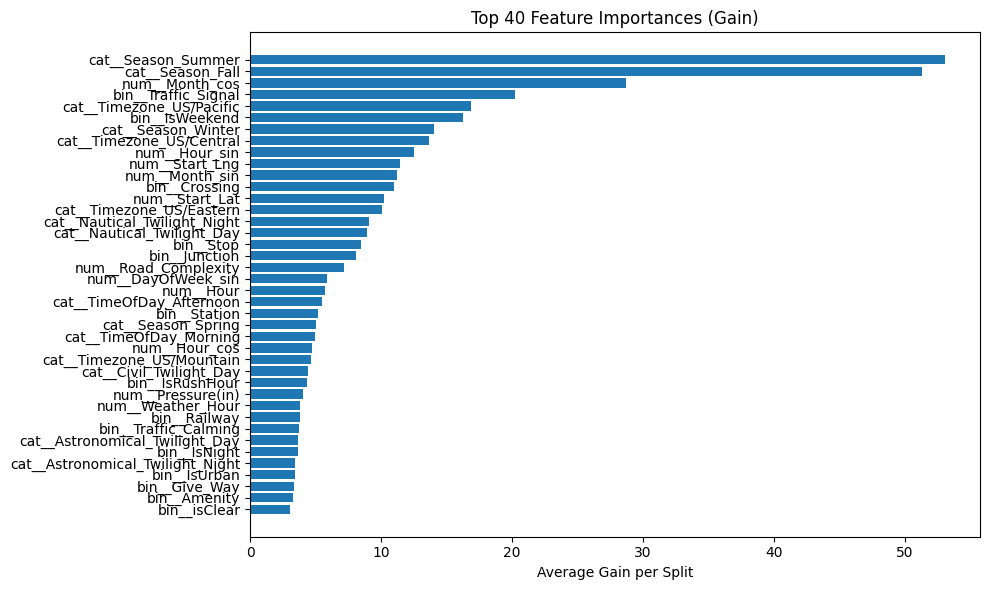

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 如果你剛剛的 pipeline 存在於變數 clf（或在磁碟裡，可用 joblib 載）
# 這段程式碼會自動抓出「真正進模型」的特徵名稱與 gain 重要度，畫出長條圖。

# 1. 自動尋找 feature-selection 步驟名稱（可能叫 select / fs / selectfrommodel …）
selector_name = next(
    (name for name, step in clf.steps if hasattr(step, 'get_support')),
    None
)

if selector_name is None:
    raise RuntimeError("Pipeline 裡找不到 feature-selection 步驟。")

selector = clf.named_steps[selector_name]
mask = selector.get_support()                           # True / False array
feat_all = clf.named_steps['prep'].get_feature_names_out()
feat_used = feat_all[mask]                              # 真正進模型的特徵

# 2. 從 XGBoost booster 取 gain 重要度（dict: {'f0':val0, 'f1':val1, ...}）
booster = clf.named_steps['model'].get_booster()
imp_gain_dict = booster.get_score(importance_type='gain')

# 3. 轉成 numpy array，跟特徵索引對應
imp_gain = np.zeros(len(feat_used))
for k, v in imp_gain_dict.items():
    idx = int(k[1:])        # 'f27' ➜ 27
    if idx < len(imp_gain): # 保險檢查
        imp_gain[idx] = v

# 4. DataFrame 排序，方便觀看 & 做圖
imp_df = (pd.DataFrame({'Feature': feat_used, 'Gain': imp_gain})
            .sort_values('Gain', ascending=False)
            .reset_index(drop=True))

# 5. 顯示一下維度資訊
print(f"原始特徵維度：{len(feat_all)}")
print(f"篩選後維度：{len(feat_used)}")

# 6. 畫 Top-20 bar chart
topk = 40
plt.figure(figsize=(10, 6))
plt.barh(imp_df['Feature'][:topk][::-1], imp_df['Gain'][:topk][::-1])
plt.xlabel("Average Gain per Split")
plt.title(f"Top {topk} Feature Importances (Gain)")
plt.tight_layout()
plt.show()
